In [47]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import my_modules.data as data
import my_modules.risk as risk

ind = data.get_ind30_vw_returns()
er = risk.annualise_rets(ind['1996':'2000'])
cov = ind['1996':'2000'].cov()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [40]:
import my_modules.portfolio as portfolio

l = ['Food', 'Beer', 'Smoke', 'Coal']
er[l]

Food     0.116799
Beer     0.141126
Smoke    0.107830
Coal     0.414689
dtype: float64

In [14]:
cov.loc[l,l]

,Food,Beer,Smoke,Coal
Food,0.002609,0.002379,0.002061,0.000027
Beer,0.002379,0.005264,0.001359,0.001728
Smoke,0.002061,0.001359,0.008349,-0.000733
Coal,0.000027,0.001728,-0.000733,0.018641


In [16]:
import numpy as np
weights = np.repeat(1/4, 4)
weights

array([0.25, 0.25, 0.25, 0.25])

In [17]:
portfolio.returns(weights, er[l])

0.19511097196038385

In [18]:
portfolio.volatility(weights, cov.loc[l,l])

0.055059195776437045

## Looking at a 2-asset frontier

In [23]:
assets = ['Games', 'Fin']

# The frontier could be calculated be going through a list, however 'list comprehension' can be used
num_points = 20
weights = [np.array([w, 1-w]) for w in np.linspace(0,1,num_points)]

In [24]:
weights

[array([0., 1.]),
 array([0.05263158, 0.94736842]),
 array([0.10526316, 0.89473684]),
 array([0.15789474, 0.84210526]),
 array([0.21052632, 0.78947368]),
 array([0.26315789, 0.73684211]),
 array([0.31578947, 0.68421053]),
 array([0.36842105, 0.63157895]),
 array([0.42105263, 0.57894737]),
 array([0.47368421, 0.52631579]),
 array([0.52631579, 0.47368421]),
 array([0.57894737, 0.42105263]),
 array([0.63157895, 0.36842105]),
 array([0.68421053, 0.31578947]),
 array([0.73684211, 0.26315789]),
 array([0.78947368, 0.21052632]),
 array([0.84210526, 0.15789474]),
 array([0.89473684, 0.10526316]),
 array([0.94736842, 0.05263158]),
 array([1., 0.])]

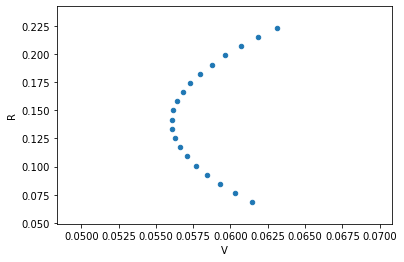

In [34]:
# for every weight we need to calculate what return and what volatily correspond to that weight
import pandas as pd
returns = [portfolio.returns(w, er[assets]) for w in weights]
vol = [portfolio.volatility(w, cov.loc[assets,assets]) for w in weights]

efficient_frontier = pd.DataFrame({'R':returns, 'V':vol})
efficient_frontier.plot.scatter(x='V', y='R')

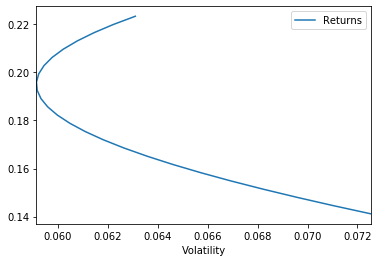

In [60]:
import my_modules.portfolio as portfolio
l = ['Fin', 'Beer']
portfolio.plot_two_asset_frontier(25, er[l], cov.loc[l,l])